In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import sys
sys.path.append('../../')
from utils.constants import GROUPS_ORDER, GROUP_ACRONYMS
from utils.dataloader import get_issues
sns.set(style='whitegrid')

issues = get_issues()
issues['group_names'] = issues['group_names'].apply(ast.literal_eval)

Average closed quick resolution issues: 36.35
Average closed slow resolution issues: 20.22


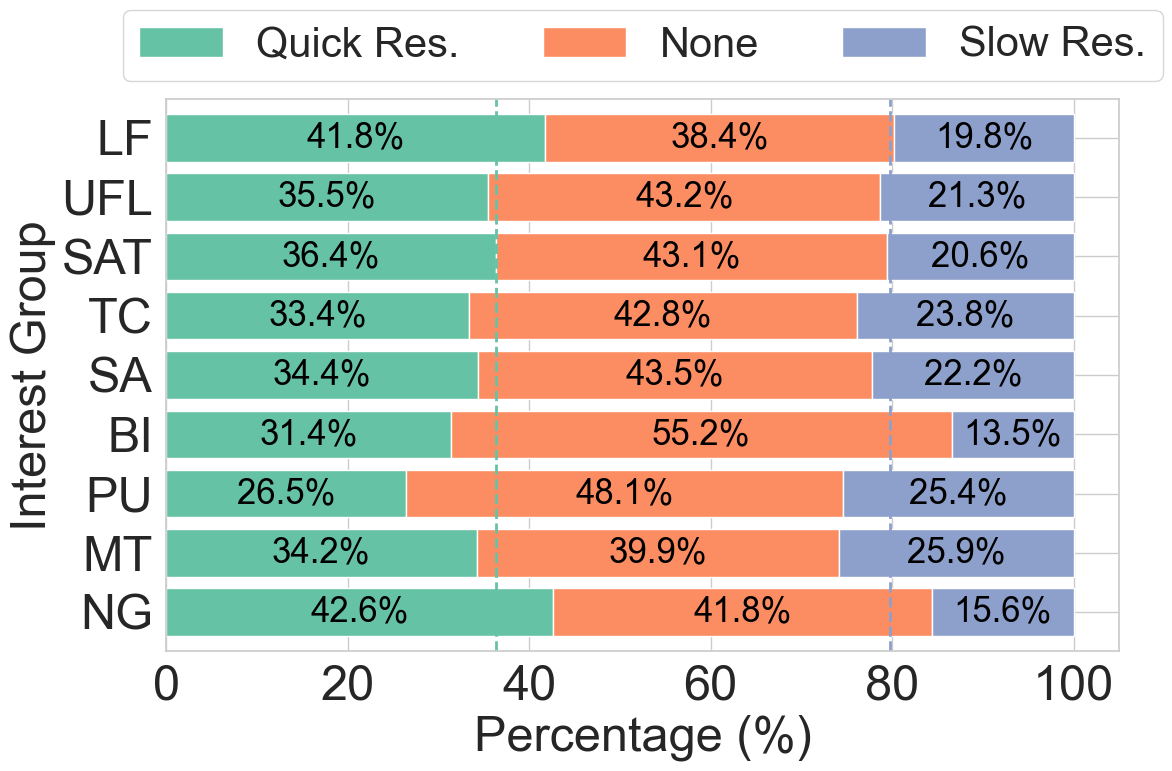

In [ ]:
# Add a stacked bar graph to show the distribution of quick resolution, slow resolution, and other issues in the middle state for each topic to Section 4.1, as part of the answer to RQ1.2.

group_counts = {}

for index, issue in issues.iterrows():
    if issue['prop:state'] == 'open':
        continue

    if issue['ig:quick resolution']:
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'quick resolution': 0, 'slow resolution': 0, 'none': 0}
            group_counts[group]['quick resolution'] += 1
    elif issue['ig:slow resolution']: 
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'quick resolution': 0, 'slow resolution': 0, 'none': 0}
            group_counts[group]['slow resolution'] += 1
    else:
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'quick resolution': 0, 'slow resolution': 0, 'none': 0}
            group_counts[group]['none'] += 1

quick_fix_average_closed = sum(counts['quick resolution'] for counts in group_counts.values()) / sum([sum(counts.values()) for counts in group_counts.values()]) * 100
slow_fix_average_closed = sum(counts['slow resolution'] for counts in group_counts.values()) / sum([sum(counts.values()) for counts in group_counts.values()]) * 100
print(f"Average closed quick resolution issues: {quick_fix_average_closed:.2f}")
print(f"Average closed slow resolution issues: {slow_fix_average_closed:.2f}")

stacked_bar_data = []
for group, counts in group_counts.items():
    total_count = counts['quick resolution'] + counts['slow resolution'] + counts['none']
    stacked_bar_data.append([group, counts['quick resolution']/total_count * 100, counts['none']/total_count * 100, counts['slow resolution']/total_count * 100])

stacked_bar_df = pd.DataFrame(stacked_bar_data, columns=['group', 'quick resolution', 'none', 'slow resolution'])
stacked_bar_df['group'] = pd.Categorical(stacked_bar_df['group'], categories=GROUPS_ORDER, ordered=True)
stacked_bar_df = stacked_bar_df.sort_values('group', ascending=False)

# Replace group names with acronyms for plotting
stacked_bar_df['group_acronym'] = stacked_bar_df['group'].map(GROUP_ACRONYMS)
stacked_bar_df = stacked_bar_df.set_index('group_acronym')


ax = stacked_bar_df[['quick resolution', 'none', 'slow resolution']].plot(
    kind='barh', stacked=True, figsize=(12, 8), color=['#66c2a5', '#fc8d62', '#8da0cb'], fontsize=35, width=0.8
)

# Add percentage text
for i, (idx, row) in enumerate(stacked_bar_df.iterrows()):
    left = 0
    for col in ['quick resolution', 'none', 'slow resolution']:
        value = row[col]
        if value > 5:  # Only show text if the bar is wide enough
            ax.text(left + value/2, i, f"{value:.1f}%", va='center', ha='center', fontsize=25, color='black')
        left += value

plt.xlabel('Percentage (%)', fontsize=35)
plt.ylabel('Interest Group', fontsize=35)
plt.legend(loc='upper center', labels=['Quick Res.', 'None', 'Slow Res.'], bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=30)
plt.axvline(x=quick_fix_average_closed, color='#66c2a5', linestyle='--', linewidth=2)
plt.axvline(x=100-slow_fix_average_closed, color='#8da0cb', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('../../../results/figures/cross_comparison/resolution_per_group.pdf', dpi=350)
plt.show()


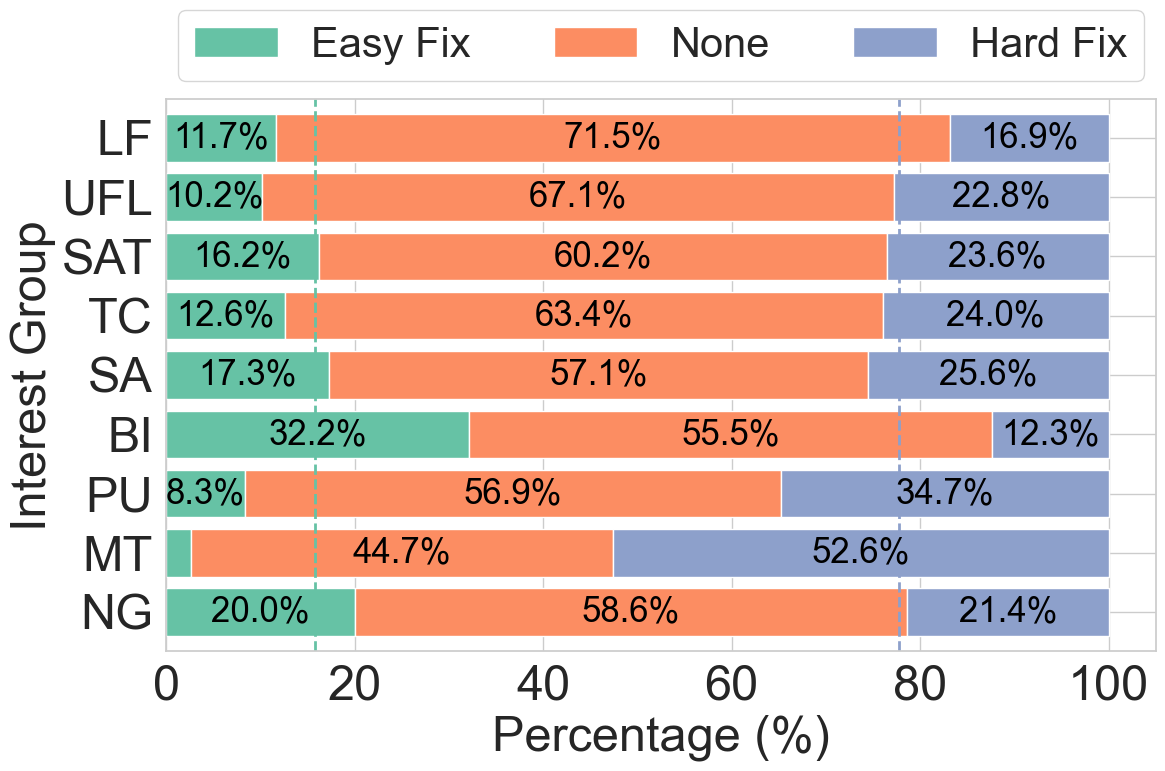

In [ ]:
# Add a stacked bar graph to show the distribution of easy fix, hard fix, and other issues in the middle state for each topic to Section 4.1, as part of the answer to RQ1.2.

group_counts = {}

for index, issue in issues.iterrows():
    if issue['prop:files'] == 0:
        continue
    if issue['prop:loc'] == 0:
        continue

    if issue['ig:easy fix']:
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'easy fix': 0, 'hard fix': 0, 'none': 0}
            group_counts[group]['easy fix'] += 1
    elif issue['ig:hard fix']: 
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'easy fix': 0, 'hard fix': 0, 'none': 0}
            group_counts[group]['hard fix'] += 1
    else:
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'easy fix': 0, 'hard fix': 0, 'none': 0}
            group_counts[group]['none'] += 1

easy_fix_average = sum(counts['easy fix'] for counts in group_counts.values()) / sum([sum(counts.values()) for counts in group_counts.values()]) * 100
hard_fix_average = sum(counts['hard fix'] for counts in group_counts.values()) / sum([sum(counts.values()) for counts in group_counts.values()]) * 100

stacked_bar_data = []
for group, counts in group_counts.items():
    total_count = counts['easy fix'] + counts['hard fix'] + counts['none']
    stacked_bar_data.append([group, counts['easy fix']/total_count * 100, counts['none']/total_count * 100, counts['hard fix']/total_count * 100])

stacked_bar_df = pd.DataFrame(stacked_bar_data, columns=['group', 'easy fix', 'none', 'hard fix'])
stacked_bar_df['group'] = pd.Categorical(stacked_bar_df['group'], categories=GROUPS_ORDER, ordered=True)
stacked_bar_df = stacked_bar_df.sort_values('group', ascending=False)

stacked_bar_df['group_acronym'] = stacked_bar_df['group'].map(GROUP_ACRONYMS)
stacked_bar_df = stacked_bar_df.set_index('group_acronym')

stacked_bar_df[['easy fix', 'none', 'hard fix']].plot(kind='barh', stacked=True, figsize=(12, 8), color=['#66c2a5', '#fc8d62', '#8da0cb'], fontsize=35, width=0.8)

# Add percentage text
ax = plt.gca()
for i, (idx, row) in enumerate(stacked_bar_df.iterrows()):
    left = 0
    for col in ['easy fix', 'none', 'hard fix']:
        value = row[col]
        if value > 5:  # Only show text if the bar is wide enough
            ax.text(left + value/2, i, f"{value:.1f}%", va='center', ha='center', fontsize=25, color='black')
        left += value

plt.xlabel('Percentage (%)', fontsize=35)
plt.ylabel('Interest Group', fontsize=35)
plt.legend(loc='upper center', labels=['Easy Fix', 'None', 'Hard Fix'], bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=30)
plt.axvline(x=easy_fix_average, color='#66c2a5', linestyle='--', linewidth=2)
plt.axvline(x=100-hard_fix_average, color='#8da0cb', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('../../../results/figures/cross_comparison/difficulty_per_group.pdf', dpi=350)
plt.show()


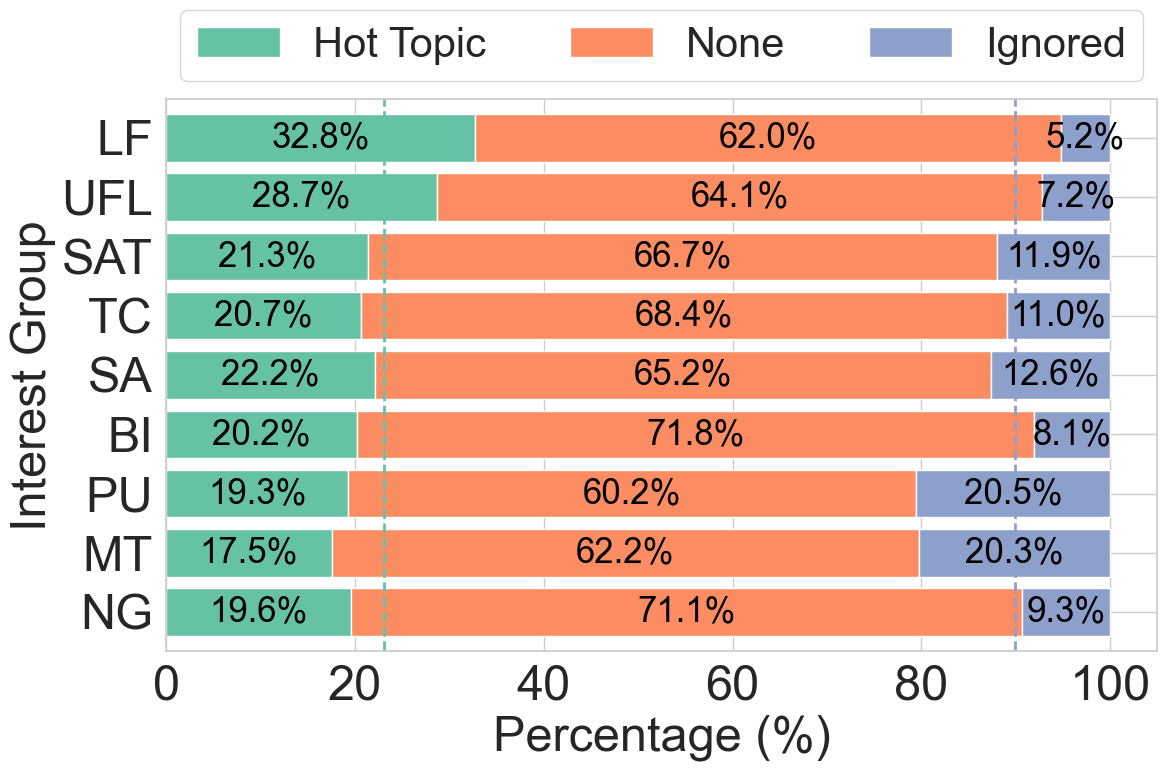

In [ ]:
# Add a stacked bar graph to show the distribution of hot topic, ignored, and other issues in the middle state for each topic to Section 4.1, as part of the answer to RQ1.2.

group_counts = {}

for index, issue in issues.iterrows():
    if issue['ig:hot topic']:
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'hot topic': 0, 'ignored': 0, 'none': 0}
            group_counts[group]['hot topic'] += 1
    elif issue['ig:ignored']: 
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'hot topic': 0, 'ignored': 0, 'none': 0}
            group_counts[group]['ignored'] += 1
    else:
        for group in issue['group_names']:
            if group not in group_counts:
                group_counts[group] = {'hot topic': 0, 'ignored': 0, 'none': 0}
            group_counts[group]['none'] += 1

hot_topic_average = sum(counts['hot topic'] for counts in group_counts.values()) / sum([sum(counts.values()) for counts in group_counts.values()]) * 100
ignored_average = sum(counts['ignored'] for counts in group_counts.values()) / sum([sum(counts.values()) for counts in group_counts.values()]) * 100

stacked_bar_data = []
for group, counts in group_counts.items():
    total_count = counts['hot topic'] + counts['ignored'] + counts['none']
    stacked_bar_data.append([group, counts['hot topic']/total_count * 100, counts['none']/total_count * 100, counts['ignored']/total_count * 100])

stacked_bar_df = pd.DataFrame(stacked_bar_data, columns=['group', 'hot topic', 'none', 'ignored'])
stacked_bar_df['group'] = pd.Categorical(stacked_bar_df['group'], categories=GROUPS_ORDER, ordered=True)
stacked_bar_df = stacked_bar_df.sort_values('group', ascending=False)

# Use acronyms for plotting
stacked_bar_df['group_acronym'] = stacked_bar_df['group'].map(GROUP_ACRONYMS)
stacked_bar_df = stacked_bar_df.set_index('group_acronym')

stacked_bar_df[['hot topic', 'none', 'ignored']].plot(kind='barh', stacked=True, figsize=(12, 8), color=['#66c2a5', '#fc8d62', '#8da0cb'], fontsize=35, width=0.8)

ax = plt.gca()
for i, (idx, row) in enumerate(stacked_bar_df.iterrows()):
    left = 0
    for col in ['hot topic', 'none', 'ignored']:
        value = row[col]
        if value > 5:  # Only show text if the bar is wide enough
            ax.text(left + value/2, i, f"{value:.1f}%", va='center', ha='center', fontsize=25, color='black')
        left += value

plt.xlabel('Percentage (%)', fontsize=35)
plt.ylabel('Interest Group', fontsize=35)
plt.legend(loc='upper center', labels=['Hot Topic', 'None', 'Ignored'], bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=30)
plt.axvline(x=hot_topic_average, color='#66c2a5', linestyle='--', linewidth=2)
plt.axvline(x=100-ignored_average, color='#8da0cb', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('../../../results/figures/cross_comparison/popularity_per_group.pdf', dpi=350)
plt.show()
